# Import Libraries


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import xgboost as xgb

# Load the Dataset

In [2]:
df = pd.read_csv('default of credit card clients.csv')

# Exploring the Dataset

In [3]:
df.head()

,Unnamed: 0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
0,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
1,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
2,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30001 entries, 0 to 30000
Data columns (total 25 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  30001 non-null  object
 1   X1          30001 non-null  object
 2   X2          30001 non-null  object
 3   X3          30001 non-null  object
 4   X4          30001 non-null  object
 5   X5          30001 non-null  object
 6   X6          30001 non-null  object
 7   X7          30001 non-null  object
 8   X8          30001 non-null  object
 9   X9          30001 non-null  object
 10  X10         30001 non-null  object
 11  X11         30001 non-null  object
 12  X12         30001 non-null  object
 13  X13         30001 non-null  object
 14  X14         30001 non-null  object
 15  X15         30001 non-null  object
 16  X16         30001 non-null  object
 17  X17         30001 non-null  object
 18  X18         30001 non-null  object
 19  X19         30001 non-null  object
 20  X20   

# Drop the first row and reset indexes

In [5]:
df =df.drop(index=0).reset_index(drop = True)

In [6]:
df.head(1)

,Unnamed: 0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1


# Rename the columns appropriately

In [7]:
df.columns = ['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE',
              'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6',
              'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4',
              'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2',
              'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
              'default'
             ]

# Coverting columns to Numeric Datatype

In [8]:
df =df.apply(pd.to_numeric, errors = 'coerce')

# Recheck the cleaned Data

In [9]:
df.head(1)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   ID         30000 non-null  int64
 1   LIMIT_BAL  30000 non-null  int64
 2   SEX        30000 non-null  int64
 3   EDUCATION  30000 non-null  int64
 4   MARRIAGE   30000 non-null  int64
 5   AGE        30000 non-null  int64
 6   PAY_0      30000 non-null  int64
 7   PAY_2      30000 non-null  int64
 8   PAY_3      30000 non-null  int64
 9   PAY_4      30000 non-null  int64
 10  PAY_5      30000 non-null  int64
 11  PAY_6      30000 non-null  int64
 12  BILL_AMT1  30000 non-null  int64
 13  BILL_AMT2  30000 non-null  int64
 14  BILL_AMT3  30000 non-null  int64
 15  BILL_AMT4  30000 non-null  int64
 16  BILL_AMT5  30000 non-null  int64
 17  BILL_AMT6  30000 non-null  int64
 18  PAY_AMT1   30000 non-null  int64
 19  PAY_AMT2   30000 non-null  int64
 20  PAY_AMT3   30000 non-null  int64
 21  PAY_AMT4   3

# Exploratory Data Analysis(EDA)

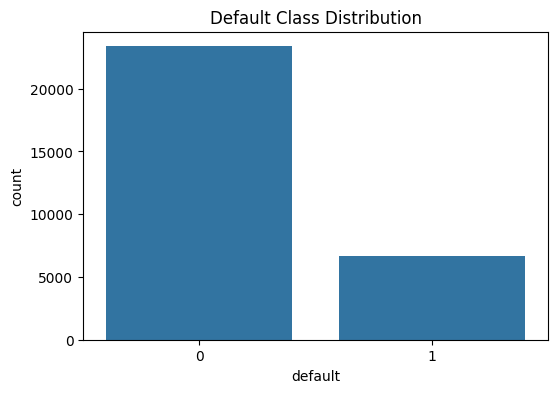

In [11]:
plt.figure(figsize = (6,4))
sns.countplot(data = df, x = 'default')
plt.title('Default Class Distribution')
plt.show()

## Explaination of the Graph
### 0 → Customer did not default
### 1 → Customer did default

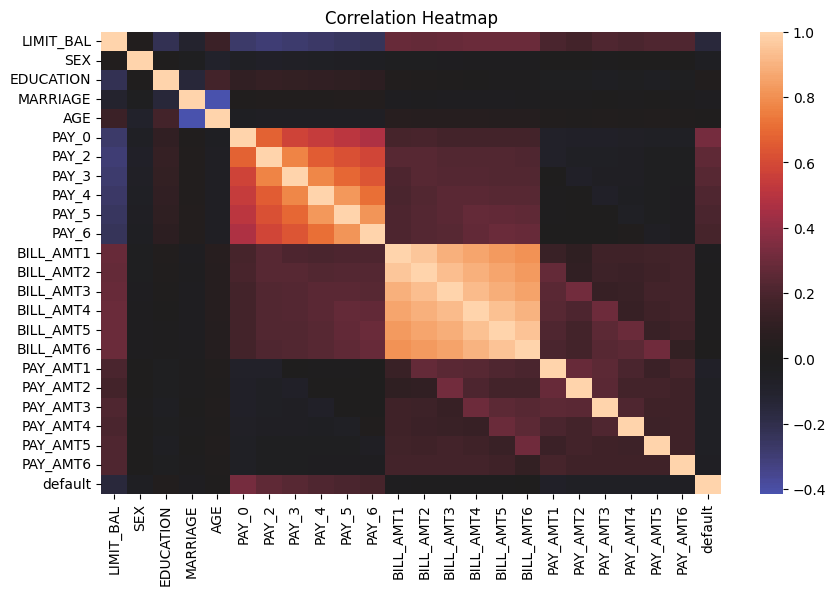

In [12]:
plt.figure(figsize=(10,6))
sns.heatmap(df.drop('ID', axis = 1).corr(), center = 0)
plt.title('Correlation Heatmap')
plt.show()

# Advanced Feature Insights

In [13]:
print('\n Default Rate:')
print(df['default'].value_counts(normalize=True))


 Default Rate:
default
0    0.7788
1    0.2212
Name: proportion, dtype: float64


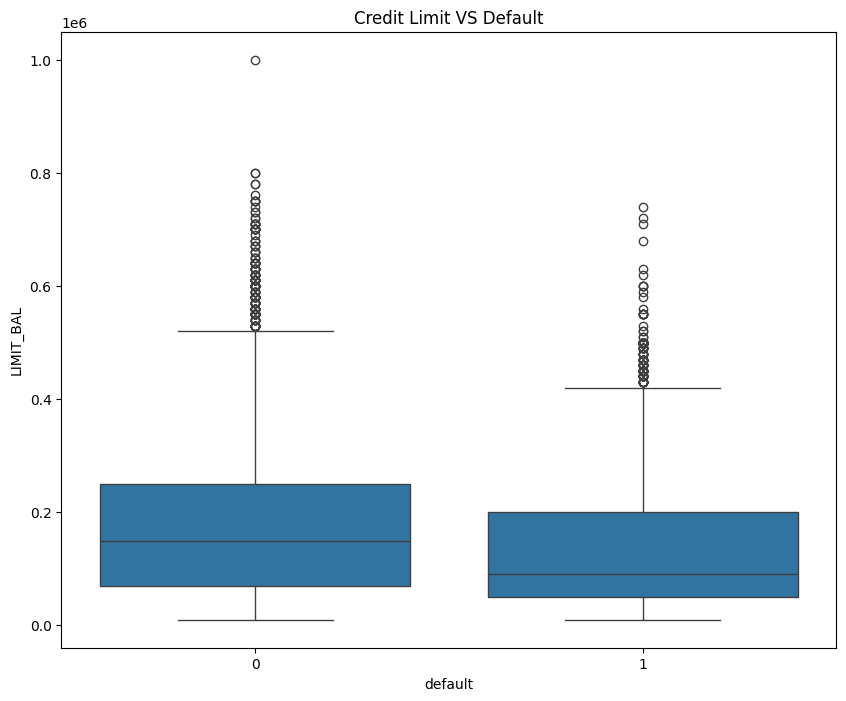

In [14]:
plt.figure(figsize = (10,8))
sns.boxplot(x ='default', y ='LIMIT_BAL', data=df)
plt.title("Credit Limit VS Default")
plt.show()

In [20]:
correlation_with_target =df.corr()['default'].drop('default').sort_values()
print("\nCorrelation_with_Target Variable(descending")
print(correlation_with_target.sort_values(ascending=False))


Correlation_with_Target Variable(descending
PAY_0        0.324794
PAY_2        0.263551
PAY_3        0.235253
PAY_4        0.216614
PAY_5        0.204149
PAY_6        0.186866
EDUCATION    0.028006
AGE          0.013890
BILL_AMT6   -0.005372
BILL_AMT5   -0.006760
BILL_AMT4   -0.010156
ID          -0.013952
BILL_AMT3   -0.014076
BILL_AMT2   -0.014193
BILL_AMT1   -0.019644
MARRIAGE    -0.024339
SEX         -0.039961
PAY_AMT6    -0.053183
PAY_AMT5    -0.055124
PAY_AMT3    -0.056250
PAY_AMT4    -0.056827
PAY_AMT2    -0.058579
PAY_AMT1    -0.072929
LIMIT_BAL   -0.153520
Name: default, dtype: float64


# Prepare Data for Modeling

In [21]:
X =df.drop(["ID", "default"], axis = 1)
y = df["default"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train XGBoost Model

In [25]:
model = xgb.XGBClassifier(eval_metric = 'logloss')
model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=None, ...)

# Evaluate Model

In [27]:
y_pred = model.predict(X_test)
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("\nAccuracy Score:")
print(accuracy_score(y_test, y_pred))


Confusion Matrix:
[[4406  281]
 [ 819  494]]

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.94      0.89      4687
           1       0.64      0.38      0.47      1313

    accuracy                           0.82      6000
   macro avg       0.74      0.66      0.68      6000
weighted avg       0.80      0.82      0.80      6000


Accuracy Score:
0.8166666666666667


# Cross Validation Accuracy

In [28]:
cv_scores =cross_val_score(model, X, y, cv = 5, scoring = 'accuracy')
print("\nCross Validation Scores:")
print(cv_scores)
print("\nMean Accuracy:")
print(cv_scores.mean())


Cross Validation Scores:
[0.801      0.8025     0.81716667 0.82683333 0.81483333]

Mean Accuracy:
0.8124666666666667


#Feature Importance

<Figure size 1000x600 with 0 Axes>

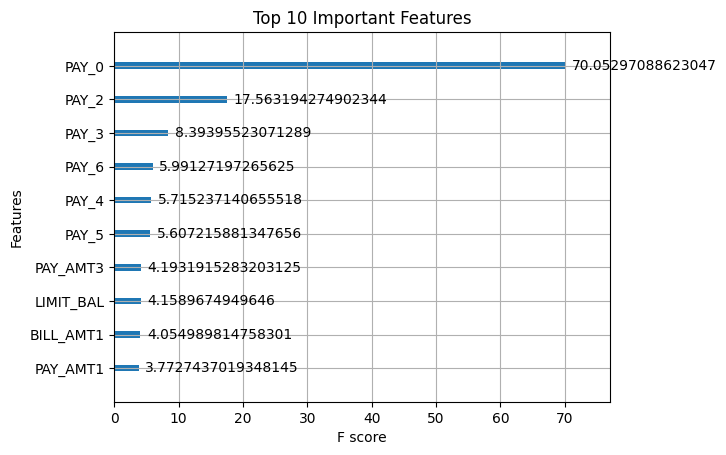

In [29]:
plt.figure(figsize=(10,6))
xgb.plot_importance(model, max_num_features =10, importance_type='gain')
plt.title('Top 10 Important Features')
plt.show()

# 📌Business & Strategic Recommendations

### 1. Customers with recent high payment delays (PAY_0, PAY_2) are most likely to default.

### 2. Monitor accounts with large credit limits but irregular payments.
### 3. Predictive risk scoring can help pre-emptively offer payment plans.
### 4. More repayment flexibility may reduce defaults in younger or lower-income demographics.
### 5. Focus collection efforts on segments with high-risk scores derived from XGBoost.
### 6. Age, past due history, and recent payment behavior should be monitored in real-time.